In [ ]:
# 12.1 日時と日時の列
import pandas as pd
pd.to_datetime('2020-01-01')

Timestamp('2020-01-01 00:00:00')

In [ ]:
# A(年)
pd.date_range(start='2021-01-01', end='2023-01-01', freq='1A')

DatetimeIndex(['2021-12-31', '2022-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [ ]:
# AS(各年の1月1日)
pd.date_range(start='2021-01-01', end='2023-01-01', freq='1AS')

DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01'], dtype='datetime64[ns]', freq='AS-JAN')

In [ ]:
# M(月1日)
pd.date_range(start='2021-01-01', end='2021-03-01', freq='2M')

DatetimeIndex(['2021-01-31'], dtype='datetime64[ns]', freq='2M')

In [ ]:
# M(各月の1日)
pd.date_range(start='2021-01-01', end='2021-03-01', freq='2MS')

DatetimeIndex(['2021-01-01', '2021-03-01'], dtype='datetime64[ns]', freq='2MS')

In [ ]:
# D(日)
pd.date_range(start='2021-01-01', end='2021-01-03', freq='1D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [ ]:
# H(時)
pd.date_range(start='2021-01-01 00:00:00', end='2021-01-01 03:00:00', freq='2H')

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 02:00:00'], dtype='datetime64[ns]', freq='2H')

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00


In [3]:
# 12.2 時系列データの予測

import matplotlib.pyplot as plt
import pandas as pd
from pmdarima.datasets import airpassengers
from sklearn.metrics import mean_squared_error

my_data = airpassengers.load_airpassengers()

In [4]:
n = len(my_data) # データ数(144)
k = 108          # 訓練データ数


In [5]:
my_ds = pd.date_range(
    start='1949/01/01',
    end='1960/12/01',
    freq='MS'
)
my_df = pd.DataFrame({
    'ds': my_ds,
    'x':range(n),
    'y':my_data},
    index=my_ds
)
my_df.head()

,ds,x,y
1949-01-01,1949-01-01,0,112.0
1949-02-01,1949-02-01,1,118.0
1949-03-01,1949-03-01,2,132.0
1949-04-01,1949-04-01,3,129.0
1949-05-01,1949-05-01,4,121.0


In [6]:
my_train = my_df[       :k]
my_test = my_df[-(n - k): ]
y = my_test.y

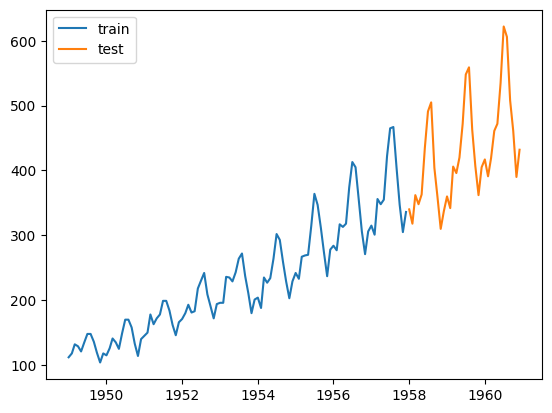

In [7]:
plt.plot(my_train.y, label='train')
plt.plot(my_test.y, label='test')
plt.legend()

In [8]:
# 12.2.2 線形回帰分析による時系列予測
from sklearn.linear_model import LinearRegression

my_lm_model = LinearRegression()
my_lm_model.fit(my_train[['x']], my_train.y)

X = my_test[['x']]
y_ = my_lm_model.predict(X)

mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

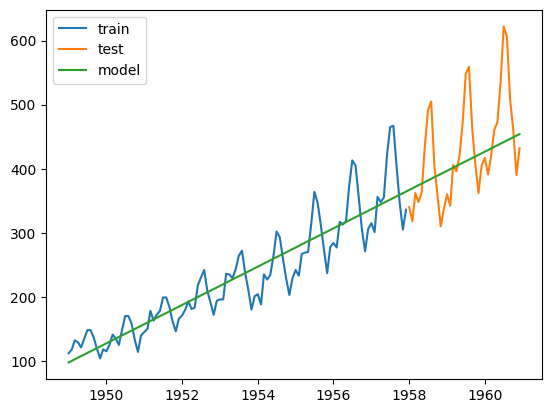

In [9]:
y_ = my_lm_model.predict(my_df[['x']])
tmp = pd.DataFrame(
    y_,
    index=my_df.index
)
plt.plot(my_train.y, label='train')
plt.plot(my_test.y,  label='test')
plt.plot(tmp, label='model')
plt.legend()

In [10]:
# 12.2.3 SARIMAモデルによる時系列予測
import pmdarima as pm
my_arima_model = pm.auto_arima(my_train.y, m=12, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=706.671, Time=1.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=707.730, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=704.186, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=704.801, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=704.001, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=704.472, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=705.993, Time=0.43 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=705.691, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=705.081, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=704.376, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=707.075, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=705.875, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 3.120 seconds


In [12]:
y_ , my_ci = my_arima_model.predict(
    len(my_test),           # 期間はテストデータと同じ
    ajpha=0.05,             # 有意水準(デフォルト)
    return_conf_int=True    # 信頼区間を求める
)
tmp = pd.DataFrame({
    'y': y_,
    'Lo': my_ci[:, 0],
    'Hi': my_ci[:, 1]},
    index=my_test.index
                   )
tmp.head()

,y,Lo,Hi
1958-01-01,345.964471,327.088699,364.840243
1958-02-01,331.731920,308.036230,355.427610
1958-03-01,386.787992,358.515740,415.060244
1958-04-01,378.774472,346.695454,410.853490
1958-05-01,385.777732,350.270764,421.284700


In [13]:
mean_squared_error(y, y_) ** 0.5

22.132236754717276

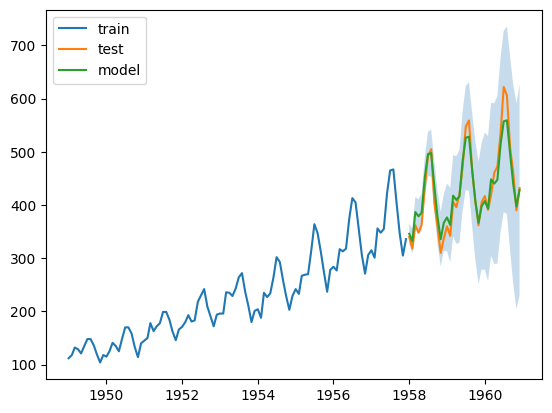

In [15]:
plt.plot(my_train.y, label='train')
plt.plot(my_test.y,  label='test')
plt.plot(tmp.y, label='model')
plt.fill_between(
    tmp.index,
    tmp.Lo,
    tmp.Hi,
    alpha=0.25 # 透明度
)
plt.legend(loc='upper left')

In [10]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [9]:
# 12.2.4 Prophetによる時系列分析
from fbprophet import Prophet
my_prophet_model = Prophet(searsonality_mode='multiplicative')
my_prophet_model.fit(my_train)

ModuleNotFoundError: ignored

In [ ]:
tmp = my_prophet_model.predict(my_test)
tmp[['ds', 'yhat', 'uhat_lower', 'yhat_upper']].head()

In [ ]:
y_ = tmp.yhat
mean_squared_error(y, y_) ** 0.5

In [ ]:
# my_prophet_model.plot(tmp) # 予測結果のみで良い場合

fig = my_prophet_model.plot(tmp)
fig.axes[0].plot(my_train.ds, my_train.y)
fig.axes[0].plot(my_test.ds, my_test.y, color='red')